In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read data from csv file
df = pd.read_csv('DS1_50.csv')
df_test = pd.read_csv('DS1_1000.csv') # (Unealistically big) test data for reliable evaluation 

Goals:
1. Predict column y from the other variables
2. Understand thre relationships between the variables, in particular which variables are relevant for predicting y. 
3. Get some understanding of the reliability of our model and of our conclusions 

#### Some commands to get a first overview

In [3]:
df.head() # First few lines

,x0,x1,x2,x3,article,y
0,129.910247,-174.295634,-0.148489,0.135006,L134QS,9.730587
1,131.935903,34.767800,0.759396,0.675498,M145RS,10.186560
2,105.054164,-102.154750,0.016013,-0.637706,Q243RA,9.427848
3,35.044431,-103.234909,0.726942,-1.651440,L134QS,7.033332
4,130.000460,-61.448860,0.311692,-1.395062,L134QS,8.096095


In [4]:
df.describe()  # Some basic statistics

,x0,x1,x2,x3,y
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,5.346166,-5.059545,-0.101508,-0.080933,8.174491
std,101.545227,106.725998,0.989033,1.664660,2.801625
min,-204.180745,-174.295634,-2.185873,-3.390625,3.452492
25%,-60.869652,-101.458428,-0.891850,-1.386011,5.867845
50%,10.215235,-18.157560,-0.036398,-0.167336,7.938910
75%,70.870635,76.284066,0.604894,1.422209,9.951101
max,207.489848,331.991841,2.015776,2.989260,15.675836


In [5]:
df.info() # Some basic info about ndata types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x0       50 non-null     float64
 1   x1       50 non-null     float64
 2   x2       50 non-null     float64
 3   x3       50 non-null     float64
 4   article  50 non-null     object 
 5   y        50 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


In [6]:
df.dtypes # even more basic info about data types

x0         float64
x1         float64
x2         float64
x3         float64
article     object
y          float64
dtype: object

In [7]:
df.columns

Index(['x0', 'x1', 'x2', 'x3', 'article', 'y'], dtype='object')

#### Make separate variables for each column for convenience

In [8]:
x0 = df['x0']
x1 = df['x1']
x2 = df['x2']
x3 = df['x3']
article = df['article']
y = df['y']

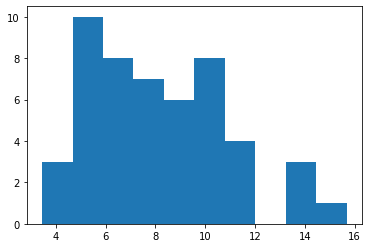

In [9]:
plt.hist(y, bins=10);

#### For taking a look at the relationships

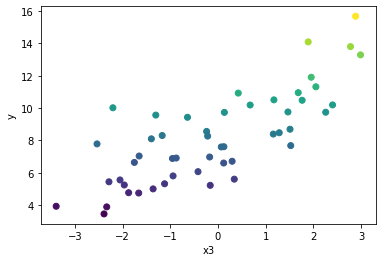

In [10]:
plt.scatter(x3,y,c=(y-min(df['y'])+1)) # scatterplot of x0 against y where the color represents y 
plt.xlabel('x3')
plt.ylabel('y');

In [11]:
# Angenommen der Zusammenhang zwischen einem Input X0 und Y ist: y = b(x0 - a)² + c + eps == b*x0² + (-2ab)X0 + (a²b+c) + eps
# 

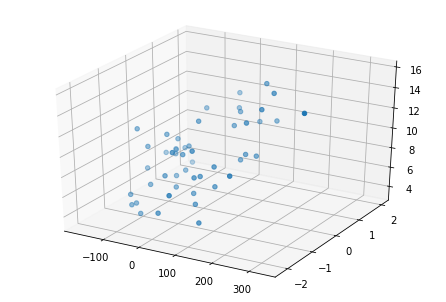

In [12]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure()
ax = Axes3D(fig)


ax.scatter(x1, x2, y)
pyplot.show()

In [13]:
# Such charts also exist in an interactive mode:
# See https://github.com/matplotlib/jupyter-matplotlib
# and instructions at 
# https://ilias.hs-karlsruhe.de/goto.php?target=file_364991_download&client_id=HSKA 

In [14]:
# Add column mit x0²
df['x0_sq'] = df['x0'] * df['x0']
df_test['x0_sq'] = df_test['x0'] * df_test['x0'] 

In [15]:
# Adding one Hot
df = pd.get_dummies(df, columns=['article'])
df_test = pd.get_dummies(df_test, columns=['article'])

In [16]:
df.head()

,x0,x1,x2,x3,y,x0_sq,article_L134QS,article_M145RS,article_M375AZ,article_N4517AS,article_N537LQ,article_Q243RA
0,129.910247,-174.295634,-0.148489,0.135006,9.730587,16876.672295,1,0,0,0,0,0
1,131.935903,34.767800,0.759396,0.675498,10.186560,17407.082392,0,1,0,0,0,0
2,105.054164,-102.154750,0.016013,-0.637706,9.427848,11036.377387,0,0,0,0,0,1
3,35.044431,-103.234909,0.726942,-1.651440,7.033332,1228.112162,1,0,0,0,0,0
4,130.000460,-61.448860,0.311692,-1.395062,8.096095,16900.119529,1,0,0,0,0,0


In [17]:
df.corr()

,x0,x1,x2,x3,y,x0_sq,article_L134QS,article_M145RS,article_M375AZ,article_N4517AS,article_N537LQ,article_Q243RA
x0,1.000000,0.162130,-0.069976,0.014506,0.410936,-0.096836,-0.081010,-0.136468,0.041172,0.072360,0.014952,0.133852
x1,0.162130,1.000000,-0.124050,0.520365,0.552432,0.225776,-0.187350,-0.019416,-0.166188,-0.094601,0.381008,0.063290
x2,-0.069976,-0.124050,1.000000,0.609138,0.458730,0.193617,0.099480,-0.236027,0.157579,0.251667,-0.069918,-0.197515
x3,0.014506,0.520365,0.609138,1.000000,0.783288,0.267837,-0.051956,-0.174251,-0.078895,0.102246,0.327152,-0.178836
y,0.410936,0.552432,0.458730,0.783288,1.000000,0.427248,-0.100691,-0.265791,-0.148730,0.148652,0.323160,-0.006195
x0_sq,-0.096836,0.225776,0.193617,0.267837,0.427248,1.000000,0.050712,-0.028109,-0.031639,0.161917,-0.056512,-0.144592
article_L134QS,-0.081010,-0.187350,0.099480,-0.051956,-0.100691,0.050712,1.000000,-0.277716,-0.149755,-0.296374,-0.277716,-0.218887
article_M145RS,-0.136468,-0.019416,-0.236027,-0.174251,-0.265791,-0.028109,-0.277716,1.000000,-0.118370,-0.234261,-0.219512,-0.173013
article_M375AZ,0.041172,-0.166188,0.157579,-0.078895,-0.148730,-0.031639,-0.149755,-0.118370,1.000000,-0.126323,-0.118370,-0.093296
article_N4517AS,0.072360,-0.094601,0.251667,0.102246,0.148652,0.161917,-0.296374,-0.234261,-0.126323,1.000000,-0.234261,-0.184637


In [18]:
df.columns

Index(['x0', 'x1', 'x2', 'x3', 'y', 'x0_sq', 'article_L134QS',
       'article_M145RS', 'article_M375AZ', 'article_N4517AS', 'article_N537LQ',
       'article_Q243RA'],
      dtype='object')

#### All pairwise relationships in one: Correlation Matrix

x0                 0.410936
x1                 0.552432
x2                 0.458730
x3                 0.783288
y                  1.000000
x0_sq              0.427248
article_L134QS    -0.100691
article_M145RS    -0.265791
article_M375AZ    -0.148730
article_N4517AS    0.148652
article_N537LQ     0.323160
article_Q243RA    -0.006195
Name: y, dtype: float64

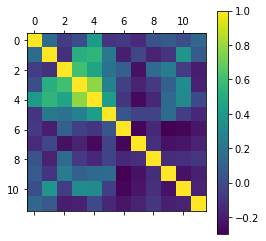

In [19]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.colorbar()
df.corr()['y']

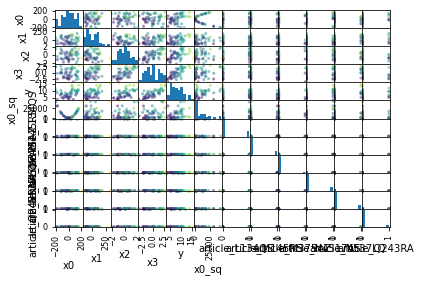

In [20]:
pd.plotting.scatter_matrix(df, c=df["y"]); # zeigt die Streuung aller Werte zu allen. So könnte man Steigende Zusammenhänge ggf erahnen

In [21]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
X = df[df.columns.difference(['y','article'])] # Remove columns 'y' and 'article'
Y = df['y']
X_test = df_test[df.columns.difference(['y','article'])]
Y_test = df_test['y']

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False) # mean nicht nutzen

Xs = pd.DataFrame(scaler.fit_transform(X[X.columns]))
Xs.columns = X.columns
Xs_test = pd.DataFrame(scaler.transform(X_test[X.columns])) # test daten müssen gleich skaliert werden wie die trainigsdaten. Nur so ist der Vergleich sinnvoll und Testdaten "richtig"
Xs_test.columns = X.columns

In [23]:
# Baut modell von Typ LinearRegression. 
regr = linear_model.LinearRegression()
regr.fit(X, Y) # Trainieren des Modells (optimale Parameter für die Trainingsdaten)
pred = regr.predict(X) # Prognose für die gleichen Daten
pred_test = regr.predict(X_test) # Für die wirklichen Testdaten
print(X.columns.values)
print('Coefficients: \n', regr.coef_) #x3 hat größten koeffizient. Wie erwartet
print('Intercept: \n', regr.intercept_) # Vor jeden Input steigungskoeffizient + KONSTANTE und das ist das hier
print('On Training set:')
print("Mean squared error: %.2f" % mean_squared_error(Y, pred)) # Ausgabe der standardwerte
print("Variance of target variable: %.2f" % np.var(Y)) # Interpretierbar als MSE des normalen Modells das immer den y-Mittelwert liefert? Avg abweichungsquadrat # Wie viel bringt das Modell, wie viel geringer sind die Y werte um den Prognosewert
print('Variance explained: %.2f' % r2_score(Y, pred)) # Welcher Anteil der Varianz ist mit dem einen Input erklärbar, wenn mehrere Inputs ist es komplizierter
print('On Test set:')
print("Mean squared error: %.2f" % mean_squared_error(Y_test, pred_test))
print("Variance of target variable: %.2f" % np.var(Y_test))
print('Variance explained: %.2f' % r2_score(Y_test, pred_test))

['article_L134QS' 'article_M145RS' 'article_M375AZ' 'article_N4517AS'
 'article_N537LQ' 'article_Q243RA' 'x0' 'x0_sq' 'x1' 'x2' 'x3']
Coefficients: 
 [-1.62902787e-01 -3.24205383e-01 -1.32770476e+00  1.44145250e-02
  9.68909284e-01  8.31489122e-01  1.12803782e-02  7.10154181e-05
  2.94089674e-03  5.38491398e-01  8.07292515e-01]
Intercept: 
 7.432715122398409
On Training set:
Mean squared error: 0.82
Variance of target variable: 7.69
Variance explained: 0.89
On Test set:
Mean squared error: 1.64
Variance of target variable: 6.98
Variance explained: 0.76


In [24]:
# Wie zu erkennen, ist die Reihenfolge nicht identisch. X3 stimmt, aber der rest nicht! 
# Auch sind x0-x2 nahe aneinander. Wobei x2 deutlich größere Koeffizient hat. Warum?
df.corr()['y']

#1. x1 beeinflusst X3 was Y beeinflusst. (X1 -> X3 -> Y) Baises Netz. Indirekter Zusammenhang. In diesem Fall bringt X1 keine (kaum) zusätzliche Informationen, da x3 bereits bekannt und verwendet
#2. Skalierung von X1 vs X3 z.B. Y = k1x1 + k3x3 +c und wir skalieren X1 zu X'1 := 100 * X1. Dann ergibt sich das selbe Modell, nur dass k1 = 1/100 und x'1 = 100X1 sein wird. Resultat:
# Der Koeffizient ist deutlich kleiner, um weiterhin das selbe Ergebnis zu bekommen

# => Hier: da die Abweichung (min, std) von x0, x1 DEUTLICH größer sind als bei x2/x3 ist hier die Skalierung der Grund.
# Also dürfen die Koeffizienten nicht so ohne weiteres verglichen werden

x0                 0.410936
x1                 0.552432
x2                 0.458730
x3                 0.783288
y                  1.000000
x0_sq              0.427248
article_L134QS    -0.100691
article_M145RS    -0.265791
article_M375AZ    -0.148730
article_N4517AS    0.148652
article_N537LQ     0.323160
article_Q243RA    -0.006195
Name: y, dtype: float64

In [25]:
# Also alles passend skalieren (normalizieren) damit die Skalierung raus ist und dann alles erneut durchlaufen lassen

In [26]:
regr = linear_model.LinearRegression()
regr.fit(Xs, Y) 
pred = regr.predict(Xs) 
pred_test = regr.predict(Xs_test) 
print(X.columns.values)
print('Coefficients: \n', regr.coef_) 
print('Intercept: \n', regr.intercept_) 
print('On Training set:')
print("Mean squared error: %.2f" % mean_squared_error(Y, pred)) # Mse MUSS auch nach der Skalierung gleich bleiben bei LinearenModellen. 
print("Variance of target variable: %.2f" % np.var(Y)) 
print('Variance explained: %.2f' % r2_score(Y, pred)) 
print('On Test set:')
print("Mean squared error: %.2f" % mean_squared_error(Y_test, pred_test))
print("Variance of target variable: %.2f" % np.var(Y_test))
print('Variance explained: %.2f' % r2_score(Y_test, pred_test))

# Jetzt passen die Werte zumindest mehr zusammen, aber die Reihenfolge passt immer noch nicht. Also MUSS es Abhängigkeiten zwischen den Inputs geben. Diese könnten ggf. auch zufällig sein 
# und damit "ungewollt". Wie könnte geprüft werden, ob es wirklich Abhängigkeiten gibt? -> Korrelationen prüfen!

['article_L134QS' 'article_M145RS' 'article_M375AZ' 'article_N4517AS'
 'article_N537LQ' 'article_Q243RA' 'x0' 'x0_sq' 'x1' 'x2' 'x3']
Coefficients: 
 [-0.11428054 -0.16206556 -0.3384993  -0.03328796  0.33473287  0.23847455
  1.13395602  0.81553167  0.31071559  0.5272329   1.33036103]
Intercept: 
 7.530349542150767
On Training set:
Mean squared error: 0.82
Variance of target variable: 7.69
Variance explained: 0.89
On Test set:
Mean squared error: 1.64
Variance of target variable: 6.98
Variance explained: 0.76


In [18]:
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     43.41
Date:                Wed, 25 Nov 2020   Prob (F-statistic):           6.74e-15
Time:                        10:02:23   Log-Likelihood:                -82.432
No. Observations:                  50   AIC:                             174.9
Df Residuals:                      45   BIC:                             184.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2744      0.190     43.507      0.0

In [19]:
# You can gnore the subsequent PCA for the moment, we will look at this later:

In [20]:
# PCA:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [21]:
print(pca.components_) # The principal component vectors
print(pca.explained_variance_ratio_)

[[ 5.94259066e-01  8.04250654e-01 -1.15863505e-03  5.97543743e-03]
 [-8.04272671e-01  5.94231322e-01 -2.35540465e-04  5.87806102e-03]]
[0.58461578 0.41524751]


In [22]:
pd.DataFrame(pca.transform(X)).head()

,0,1
0,-62.083556,-200.747591
1,107.261789,-78.141766
2,-18.839964,-137.892730
3,-61.319482,-82.233807
4,28.717469,-133.772161
